In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


    Problem Statement:
    `What are all the factors that could influence residential home prices across the United States over the next decade`

    The first step of solving the problem is to collect the data. Since there is a time constrain for project completion I have sourced the data from a kaggle data source that fits the problem statement


    Link for the data : https://www.kaggle.com/datasets/ankitsharma0467/factors-influence-the-home-prices-across-us

    In the next few steps is data cleaning of the suppy_data.csv

In [235]:
supply_df = pd.read_csv("./data/supply_data.csv",)
supply_df.head()


,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


In [236]:
supply_df['Period'] = pd.to_datetime(supply_df['Period'], format='%d-%m-%Y')


In [237]:
supply_df = supply_df.drop("Unnamed: 0", axis=1).set_index("Period")
supply_df.head()


,Permit_Number,construction,Homes_Sold,Housing_Starts
Period,,,,
2000-01-01,1727,353065,873,1636
2000-02-01,1692,351933,856,1737
2000-03-01,1651,353452,900,1604
2000-04-01,1597,356188,841,1626
2000-05-01,1543,349907,857,1575


In [238]:
supply_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2000-01-01 to 2020-10-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Permit_Number   250 non-null    int64
 1   construction    250 non-null    int64
 2   Homes_Sold      250 non-null    int64
 3   Housing_Starts  250 non-null    int64
dtypes: int64(4)
memory usage: 9.8 KB


In [239]:
supply_df.describe()


,Permit_Number,construction,Homes_Sold,Housing_Starts
count,250.000000,250.000000,250.000000,250.000000
mean,1317.200000,428859.360000,697.272000,1269.060000
std,470.104252,122721.914363,300.035978,460.534507
min,513.000000,236512.000000,270.000000,478.000000
25%,998.500000,340081.750000,436.500000,926.250000
50%,1302.000000,415920.000000,624.500000,1218.000000
75%,1658.250000,537308.750000,940.500000,1625.750000
max,2263.000000,678562.000000,1389.000000,2273.000000


    Checking the corelation between features

In [240]:
from sklearn.preprocessing import StandardScaler


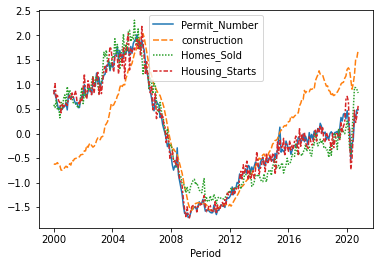

In [241]:
scaler = StandardScaler()
plot_df = pd.DataFrame(scaler.fit_transform(supply_df))\
    .set_index(pd.Index(supply_df.index))
sns.lineplot(data=plot_df,)
plt.legend(labels=supply_df.columns.to_list())


<AxesSubplot:>

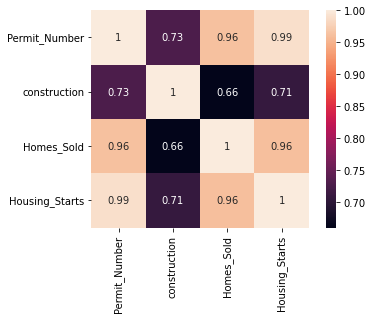

In [242]:
sns.heatmap(data=supply_df.corr(), square=True, annot=True)


    From above plots its understood almost all features are highly correlated hence not much useful for prediction

    In the next few steps is data cleaning of the demand_data.csv
    This data contains our target variable HPI

In [243]:
demand_df = pd.read_csv("./data/demand_data.csv",)
demand_df.head()


,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [244]:
demand_df['DATE'] = pd.to_datetime(demand_df['DATE'], format='%Y-%m-%d')
demand_df = demand_df.set_index("DATE")
demand_df.head()


,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
DATE,,,,,
2000-01-01,4.03,8.26,12935.252,1.95,101.34
2000-04-01,3.93,8.32,13170.749,1.97,103.67
2000-07-01,4.00,8.02,13183.890,2.09,105.79
2000-10-01,3.90,7.62,13262.250,2.23,108.27
2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [245]:
demand_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2000-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UNEM_RATE     84 non-null     float64
 1   MORTGAGE      84 non-null     float64
 2   GDPC1         84 non-null     float64
 3   FORECLOSURES  84 non-null     float64
 4   HPI           84 non-null     float64
dtypes: float64(5)
memory usage: 3.9 KB


In [246]:
demand_df.describe()


,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.986667,5.092381,15968.048810,4.745119,161.669405
std,1.976243,1.324841,1762.701831,3.290622,30.778158
min,3.600000,2.760000,12935.252000,1.410000,101.340000
25%,4.552500,3.942500,14821.741750,2.097500,140.495000
50%,5.430000,4.885000,15768.528500,3.160000,162.240000
75%,7.005000,6.135000,17394.926250,7.517500,182.945000
max,13.070000,8.320000,19202.310000,11.540000,232.550000


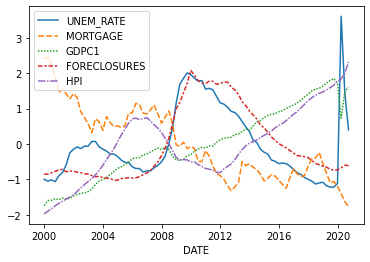

In [247]:
scaler = StandardScaler()
plot_df = pd.DataFrame(scaler.fit_transform(demand_df))\
    .set_index(pd.Index(demand_df.index))
sns.lineplot(data=plot_df,)
plt.legend(labels=demand_df.columns.to_list())


<AxesSubplot:>

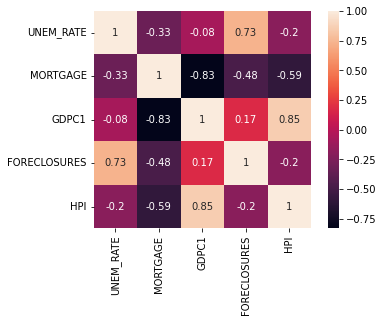

In [248]:
sns.heatmap(data=demand_df.corr(), square=True, annot=True)


    Unlike the previous data this data is not highly correlated 

    Next few steps we visualize the relation between the primary supply indicator the houses_sold vs the hpi 

In [249]:
supply_vs_hdi = pd.DataFrame(supply_df['Homes_Sold'].resample('3M',).sum())\
    .set_index(pd.Index(demand_df.index))
supply_vs_hdi.shape


(84, 1)

In [250]:
supply_vs_hdi = supply_vs_hdi.join(demand_df['HPI'])
supply_vs_hdi.head()


,Homes_Sold,HPI
DATE,,
2000-01-01,873,101.34
2000-04-01,2597,103.67
2000-07-01,2537,105.79
2000-10-01,2693,108.27
2001-01-01,2799,110.48


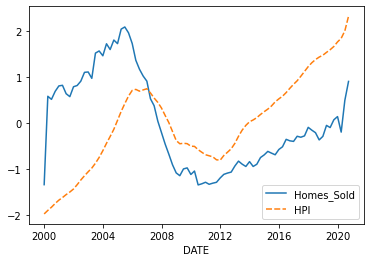

In [251]:
scaler = StandardScaler()
plot_df = pd.DataFrame(scaler.fit_transform(supply_vs_hdi))\
    .set_index(pd.Index(supply_vs_hdi.index))
sns.lineplot(data=plot_df,)
plt.legend(labels=supply_vs_hdi.columns.to_list())


    We have one problem that is the data points are low 250 in supply and 84 in demand data.
    The demand data is quarterly and supply is monthly. to avoid low data points of we will split the quarterly data into month wise using mean. once we have resampled we will combine it into one data-frame

In [252]:
demand_df = pd.DataFrame(demand_df.resample('1M',).ffill().apply(
    lambda x: round(x/3, 2))).set_index(supply_df.index)


In [253]:
demand_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2000-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UNEM_RATE     250 non-null    float64
 1   MORTGAGE      250 non-null    float64
 2   GDPC1         250 non-null    float64
 3   FORECLOSURES  250 non-null    float64
 4   HPI           250 non-null    float64
dtypes: float64(5)
memory usage: 11.7 KB


In [254]:
combined_df = supply_df.join(demand_df)
combined_df.head()


,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
Period,,,,,,,,,
2000-01-01,1727,353065,873,1636,1.34,2.75,4311.75,0.65,33.78
2000-02-01,1692,351933,856,1737,1.34,2.75,4311.75,0.65,33.78
2000-03-01,1651,353452,900,1604,1.34,2.75,4311.75,0.65,33.78
2000-04-01,1597,356188,841,1626,1.31,2.77,4390.25,0.66,34.56
2000-05-01,1543,349907,857,1575,1.31,2.77,4390.25,0.66,34.56


In [255]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2000-01-01 to 2020-10-01
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Permit_Number   250 non-null    int64  
 1   construction    250 non-null    int64  
 2   Homes_Sold      250 non-null    int64  
 3   Housing_Starts  250 non-null    int64  
 4   UNEM_RATE       250 non-null    float64
 5   MORTGAGE        250 non-null    float64
 6   GDPC1           250 non-null    float64
 7   FORECLOSURES    250 non-null    float64
 8   HPI             250 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 19.5 KB


    The problem with having low data on time series is we are not able to use the traditional ML techniques to do our forecasting because we have low data to recognize patterns. But the LSTM forecasting methods will help us overcome this by doing a Vector input of the previous data to make a prediction of the future.

    Scaling the data

In [256]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
combined_df_X, combined_df_y = combined_df.drop(
    "HPI", axis=1), combined_df[["HPI"]]
scaled_X, scaled_y = pd.DataFrame(scaler_X.fit_transform(
    combined_df_X), columns=combined_df_X.columns), pd.DataFrame(scaler_y.fit_transform(combined_df_y), columns=combined_df_y.columns)
combined_df_scaled = scaled_X.join(scaled_y)


<AxesSubplot:>

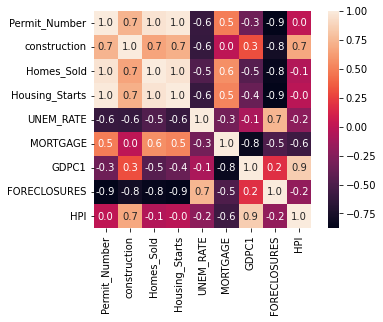

In [192]:
sns.heatmap(data=combined_df_scaled.corr(), square=True, annot=True, fmt=".1f")

In [193]:
def df_to_LSTM_input(df: pd.DataFrame, target=1, window=1, ):
    df_ = pd.DataFrame(df.apply(
        list, axis=1)).reset_index()
    df_ = df_.apply(lambda x: list(df_[0][max(
        int(x.name)-window, 0):int(x.name)].values), axis=1)
    return df_[window:].to_list(), df[target][window:].to_list()


In [194]:
from sklearn.model_selection import train_test_split
window = 2
features = combined_df_scaled.columns.to_list()
X, y = df_to_LSTM_input(
    combined_df_scaled[features], target='HPI', window=window)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.30, shuffle=False)

    Nh=Ns/(α∗(Ni+No))

In [195]:
(len(y_train))//(2*(window*len(features)+1))

3

    Creating a LSTM deep learning model

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import tensorflow as tf

# run for local CUDA memory limiting

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)

early_stopping = EarlyStopping(
    min_delta=0.0001,  # minimium amount of change to count as an improvement
    patience=20,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = Sequential()
model.add(InputLayer((window, len(features))))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(32, 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, 'linear'))

model.summary()


In [197]:

model.compile(loss='mse', optimizer='adam',)

In [198]:
history = model.fit(X_train, y_train, validation_data=(
    X_valid, y_valid), epochs=300, batch_size=2, callbacks=[early_stopping])


Epoch 1/300
61/61 [==============================] - 2s 9ms/step - loss: 0.5483 - val_loss: 0.0935
Epoch 2/300
61/61 [==============================] - 0s 4ms/step - loss: 0.1192 - val_loss: 0.1001
Epoch 3/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0623 - val_loss: 0.0823
Epoch 4/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0875
Epoch 5/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0550 - val_loss: 0.0687
Epoch 6/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.0805
Epoch 7/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.0589
Epoch 8/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0592
Epoch 9/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.0534
Epoch 10/300
61/61 [==============================] - 0s 4ms/step - loss: 0.0654 - val_loss: 0.0629
Epoch 11/

Minimum validation loss: 0.017369089648127556


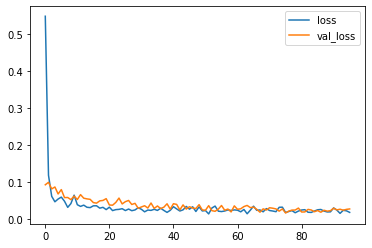

In [199]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


<AxesSubplot:>

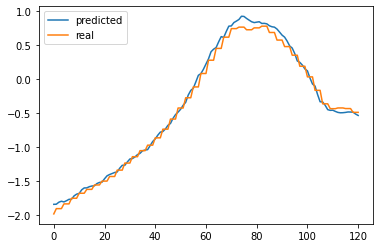

In [200]:
train_predictions = model.predict(X_train).flatten()
sns.lineplot(data=train_predictions, label='predicted')
sns.lineplot(data=y_train, label='real')

<AxesSubplot:>

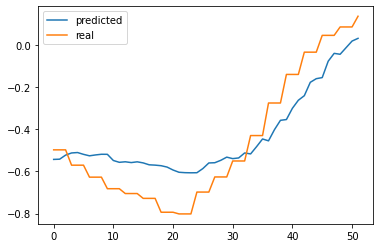

In [201]:
valid_predictions = model.predict(X_valid).flatten()
sns.lineplot(data=valid_predictions, label='predicted')
sns.lineplot(data=y_valid, label='real')

<AxesSubplot:>

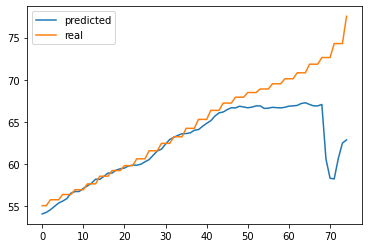

In [212]:
test_predictions = model.predict(X_test).flatten()
test_predictions = scaler_y.inverse_transform(
    pd.DataFrame(test_predictions)).flatten()
test_y = scaler_y.inverse_transform(pd.DataFrame(y_test)).flatten()
sns.lineplot(data=test_predictions, label='predicted')
sns.lineplot(data=test_y, label='real')


    Although the LSTM model has given good results with low data. There is one problem . Deep learning models are considered black-box models . Hens we have to use a Gradient tape method to identify the influence of features on the HPI

In [203]:
def gradient_importance(seq, model):
    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)
    with tf.GradientTape() as tape:
        predictions = model(seq)
    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads

In [204]:
importance = [gradient_importance(np.array(seq), model) for seq in X_test]
importance_df = pd.DataFrame(importance, columns = combined_df.columns).mean().mul(100)

<AxesSubplot:>

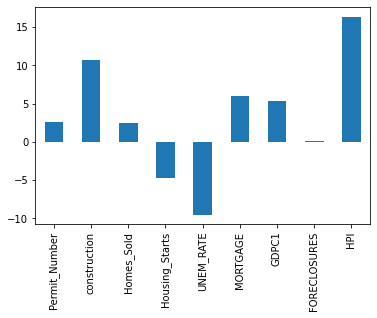

In [205]:
importance_df.plot(kind='bar')

<AxesSubplot:ylabel='None'>

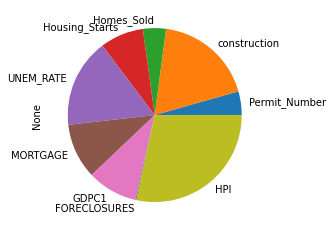

In [206]:
importance_df.abs().plot(kind='pie')


    From the above plots we can understand that the 3 most important features influencing the future HPI are:
    -   Current HPI
    -   Unemployment Rate
    -   Construction Spending

    The correlation of these features can be got from the correlation matrix . By combining the two we can get a better understanding

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Permit_Number'),
  Text(1, 0, 'construction'),
  Text(2, 0, 'Homes_Sold'),
  Text(3, 0, 'Housing_Starts'),
  Text(4, 0, 'UNEM_RATE'),
  Text(5, 0, 'MORTGAGE'),
  Text(6, 0, 'GDPC1'),
  Text(7, 0, 'FORECLOSURES'),
  Text(8, 0, 'HPI')])

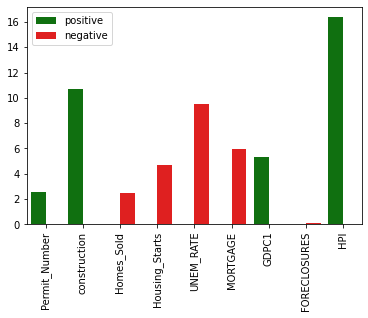

In [286]:
sign_ = combined_df_scaled.corr()['HPI'] > 0
sign_ = sign_.map({True:'positive',False:'negative'})
sns.barplot(x=importance_df.index, y=importance_df.abs().values,
            hue=sign_.values, palette=["green", "red"])
plt.xticks(rotation=90)

    The next few blocks we serialize the model and useful variables to use in our web app

In [207]:
serialized_fpath = './serialized'

In [ ]:
model.save(f'{serialized_fpath}/keras.model')

In [ ]:
from joblib import dump
dump([scaler_X, scaler_y ], f'{serialized_fpath}/scaler.joblib')

In [210]:
features_info_df = combined_df.describe().drop(
    ['count', 'std', '25%', '50%', '75%'])
features_info_df.loc['step'] = features_info_df.loc['mean']*0.05
features_info_df = features_info_df.astype(combined_df.dtypes).round(2)
features_info_df.loc['name'] = \
    ["Permits", "Construction Spending", "Houses Sold", "Housing Projects",
        "Unemployment %", "Mortgage %", "GDP %", "Foreclosures %", "House price Index"]
features_info_df

,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
mean,1317,428859,697,1269,1.99,1.7,5315.22,1.59,53.7
min,513,236512,270,478,1.2,0.92,4311.75,0.47,33.78
max,2263,678562,1389,2273,4.36,2.77,6400.77,3.85,77.52
step,65,21442,34,63,0.1,0.09,265.76,0.08,2.69
name,Permits,Construction Spending,Houses Sold,Housing Projects,Unemployment %,Mortgage %,GDP %,Foreclosures %,House price Index


In [ ]:
dump(features_info_df.to_dict(),f'{serialized_fpath}/features_info.joblib')